# IMAGE PROCESSING PROJECT
Latest update: 5/10 2020

**NOTE:** this code only changes the image inside the dashed lines!! 

In [1]:
%% Settings
clear all, close all
warning('off')
set(0,'DefaultFigureWindowStyle','docked')

col_red = [160/255, 69/255, 85/255];
col_green = [128/255, 179/255, 162/255];
col_blue = [86/255, 123/255, 184/255];


In [2]:
I = webread('http://fy.chalmers.se/~romeo/RRY025/mfiles/film1_big.jpg');
%I = imread('film1_big.jpg'); % if the link stops existing open from local

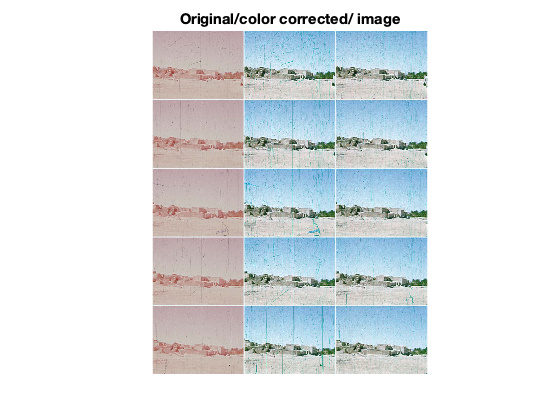

In [3]:
figure(1); imshow(I, []);
title('Original/color corrected/ image')

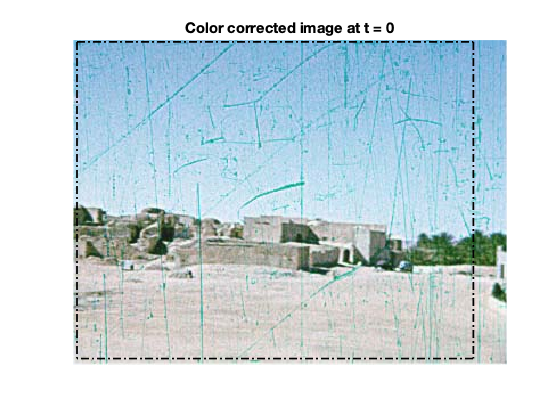

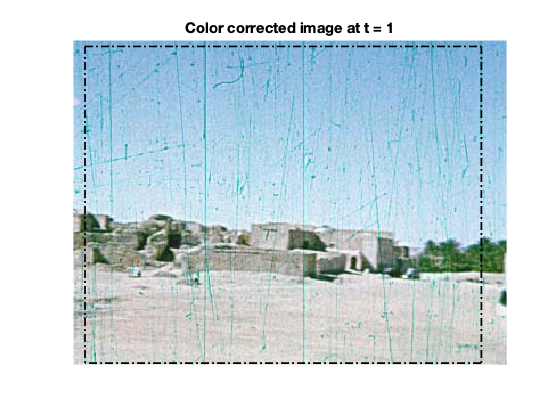

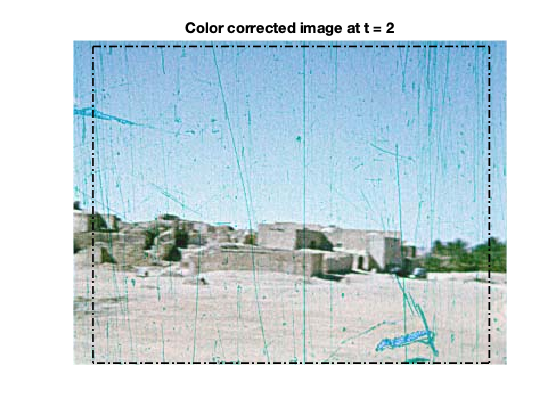

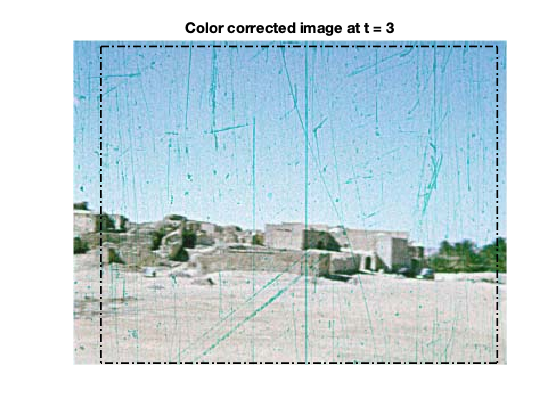

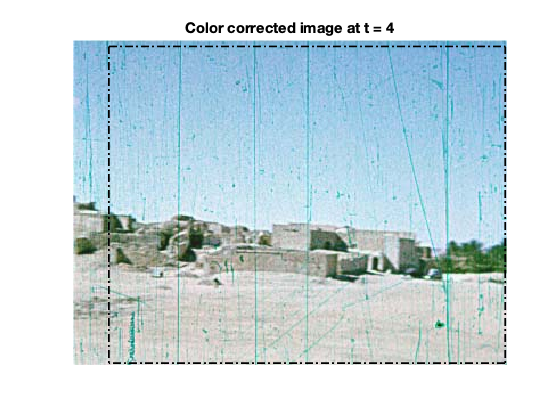

In [4]:
x_old = [4,288,291,575,579,863,867,1151,1155,1439];
y_old = [385, 765];

x = [6, 284, 297, 575, 585, 863, 873, 1151, 1161, 1439];
y = [389, 737, 396, 744, 403, 751, 410, 758, 417, 765];

for i=1:5
    fig = figure(i+1);
    imshow(I(x_old(2*i-1):x_old(2*i),y_old(1):y_old(2),:), []);
    
    x1 = abs(x(2*i-1)-x_old(2*i-1));
    x2 = abs(x_old(2*i)-(x_old(2*i-1)))-abs(x(2*i)-x_old(2*i));
    y1 = abs(y(2*i-1)-y_old(1));
    y2 = abs((y_old(2)-y_old(1)))-abs(y(2*i)-y_old(2));
    
    line([y1 y1], [x1 x2], 'color', 'white', 'linewidth',1.3, 'linestyle', '-.');
    line([y2 y2], [x1 x2], 'color', 'w', 'linewidth',1.3, 'linestyle', '-.');
    line([y1 y2], [x1 x1], 'color', 'w','linewidth',1.3, 'linestyle', '-.');
    line([y2 y1], [x2 x2], 'color', 'w', 'linewidth',1.3, 'linestyle', '-.');
    
    title(['Color corrected image at t = ' num2str(i-1)]) 
end

### Analysis of the time series
**Comment:** the camera moves to the left (i.e. the background moves to the right). This means that the background to the left in image one (t=0) doesn't exist in the other images (and the same goes for the background to the right in the last image (t=4)). When taking this into account one needs to remove 11 pixel columns at both sides. This doesnt have a huge impact on the image processing but is a limiting factor. A possible solution might be to only compare two or three images at a time instead of the whole series.

In [5]:
%% Create RGB images and the separate color representations of each image in the time series

I_0 = I(x(1):x(2),y(1):y(2),:);
I_0_r = I(x(1):x(2),y(1):y(2),1);
I_0_g = I(x(1):x(2),y(1):y(2),2);
I_0_b = I(x(1):x(2),y(1):y(2),3);

I_1 = I(x(3):x(4),y(3):y(4),:);
I_1_r = I(x(3):x(4),y(3):y(4),1);
I_1_g = I(x(3):x(4),y(3):y(4),2);
I_1_b = I(x(3):x(4),y(3):y(4),3);

I_2 = I(x(5):x(6),y(5):y(6),:);
I_2_r = I(x(5):x(6),y(5):y(6),1);
I_2_g = I(x(5):x(6),y(5):y(6),2);
I_2_b = I(x(5):x(6),y(5):y(6),3);

I_3 = I(x(7):x(8),y(7):y(8),:);
I_3_r = I(x(7):x(8),y(7):y(8),1);
I_3_g = I(x(7):x(8),y(7):y(8),2);
I_3_b = I(x(7):x(8),y(7):y(8),3);

I_4 = I(x(9):x(10),y(9):y(10),:);
I_4_r = I(x(9):x(10),y(9):y(10),1);
I_4_g = I(x(9):x(10),y(9):y(10),2);
I_4_b = I(x(9):x(10),y(9):y(10),3);


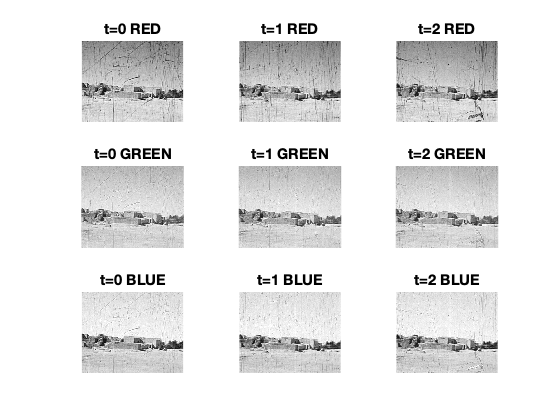

In [6]:
figure(7);
subplot(3,3,1); imshow(I_0_r)
title('t=0 RED')

subplot(3,3,2); imshow(I_1_r)
title('t=1 RED')

subplot(3,3,3); imshow(I_2_r)
title('t=2 RED')

subplot(3,3,4); imshow(I_0_g)
title('t=0 GREEN')

subplot(3,3,5); imshow(I_1_g)
title('t=1 GREEN')

subplot(3,3,6); imshow(I_2_g)
title('t=2 GREEN')

subplot(3,3,7); imshow(I_0_b)
title('t=0 BLUE')

subplot(3,3,8); imshow(I_1_b)
title('t=1 BLUE')

subplot(3,3,9); imshow(I_2_b)
title('t=2 BLUE')


**Observation:** The images have different brightness (red<green<blue) and the scratches are the most clear in red. The scratches are dark and mostly vertical but there are also some diagonal ones.

First try to compare the red parts of the different images in the time series!

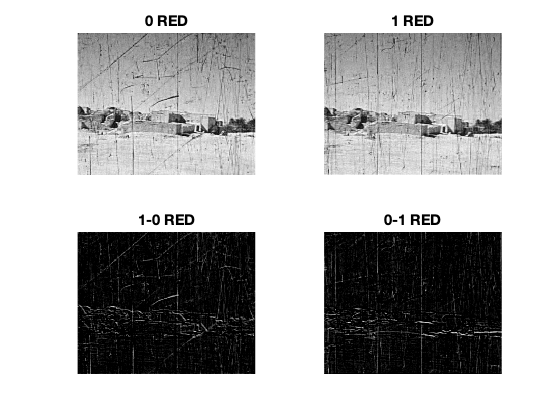

In [7]:
figure(8);
subplot(2,2,1); imshow(I_0_r)
title('0 RED')

subplot(2,2,2); imshow(I_1_r)
title('1 RED')

subplot(2,2,3); imshow(I_1_r-I_0_r)
title('1-0 RED')

subplot(2,2,4); imshow(I_0_r-I_1_r)
title('0-1 RED')


**Observation:** the order of subtracting images matter! (because the minimum value of each pixel is 0). The scratches seen in the subtracted image are the ones from I_2 if the subtraction is on the form I_1-I_2.

Try to subtract I_1 from all the other images and then compute some sort of average!

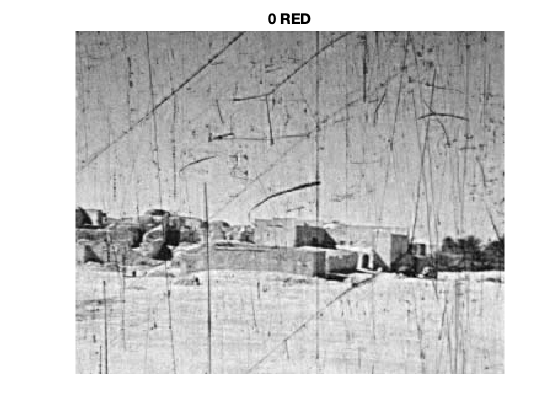

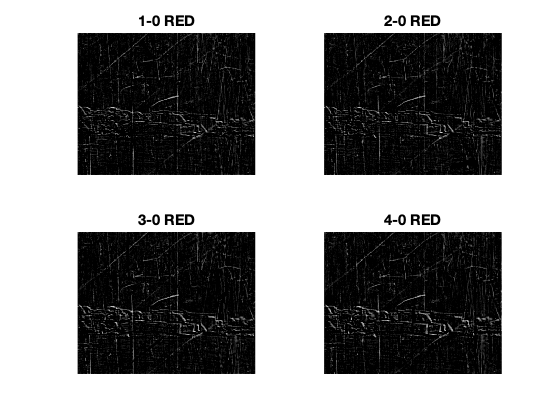

In [8]:
figure(9); imshow(I_0_r);
title('0 RED')

figure(10);
subplot(2,2,1);  imshow(I_1_r-I_0_r);
title('1-0 RED')

subplot(2,2,2); imshow(I_2_r-I_0_r);
title('2-0 RED')

subplot(2,2,3); imshow(I_3_r-I_0_r);
title('3-0 RED')

subplot(2,2,4); imshow(I_4_r-I_0_r);
title('4-0 RED')

**Observation:** the background is still visible! The correction of the movement might be wrong...

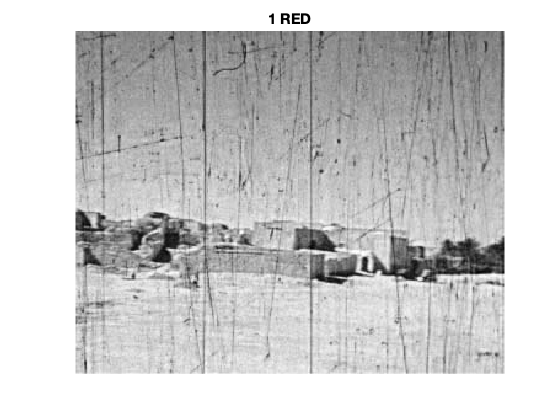

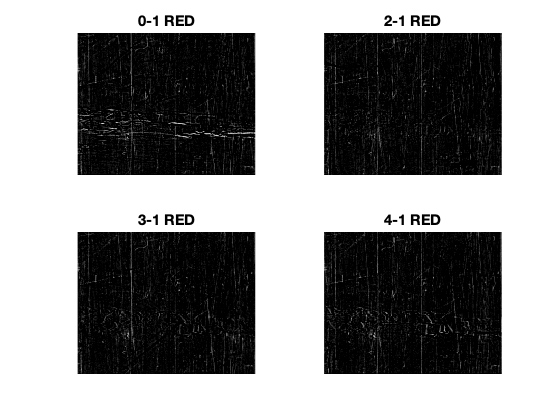

In [9]:
figure(11); imshow(I_1_r);
title('1 RED')

figure(12);
subplot(2,2,1);  imshow(I_0_r-I_1_r);
title('0-1 RED')

subplot(2,2,2); imshow(I_2_r-I_1_r);
title('2-1 RED')

subplot(2,2,3); imshow(I_3_r-I_1_r);
title('3-1 RED')

subplot(2,2,4); imshow(I_4_r-I_1_r);
title('4-1 RED')

**Observation:** the background is the most visible in image 0-1 and 4-1 but not visible at all in 2-1 and 3-1!

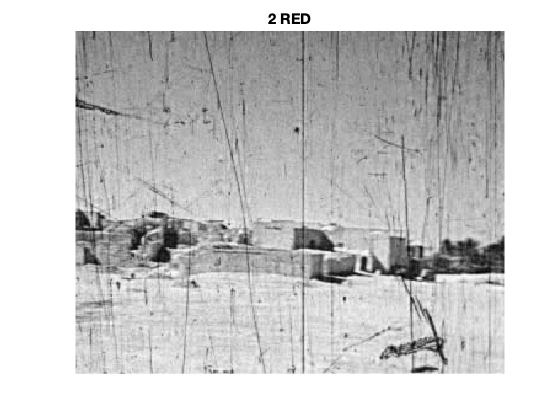

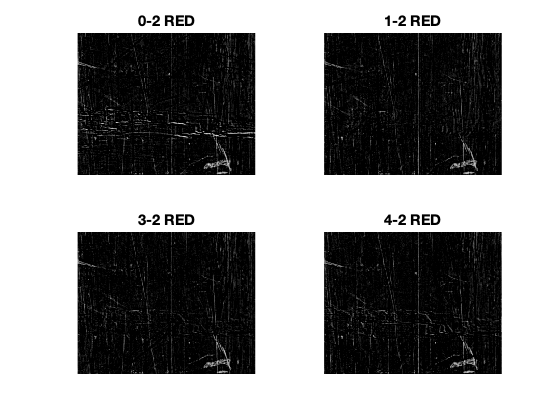

In [10]:
figure(13); imshow(I_2_r);
title('2 RED')

figure(14);
subplot(2,2,1);  imshow(I_0_r-I_2_r);
title('0-2 RED')

subplot(2,2,2); imshow(I_1_r-I_2_r);
title('1-2 RED')

subplot(2,2,3); imshow(I_3_r-I_2_r);
title('3-2 RED')

subplot(2,2,4); imshow(I_4_r-I_2_r);
title('4-2 RED')

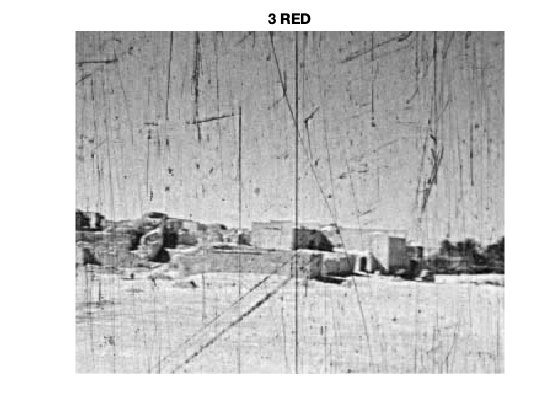

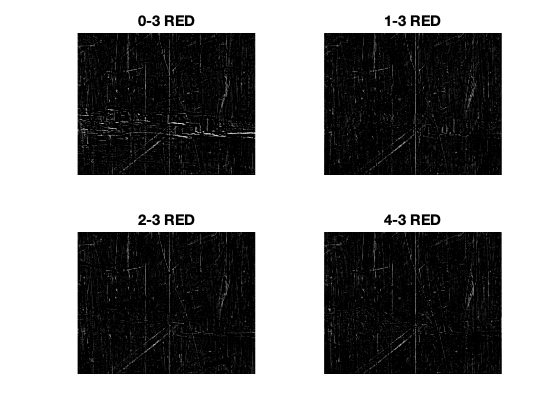

In [11]:
figure(15); imshow(I_3_r);
title('3 RED')

figure(16);
subplot(2,2,1);  imshow(I_0_r-I_3_r);
title('0-3 RED')

subplot(2,2,2); imshow(I_1_r-I_3_r);
title('1-3 RED')

subplot(2,2,3); imshow(I_2_r-I_3_r);
title('2-3 RED')

subplot(2,2,4); imshow(I_4_r-I_3_r);
title('4-3 RED')

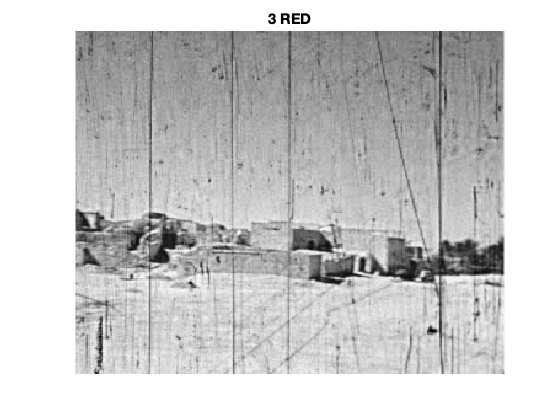

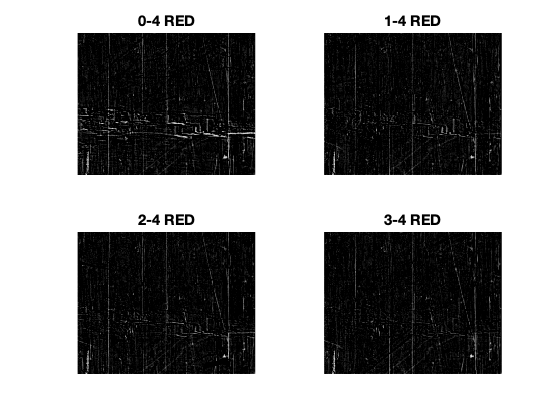

In [12]:
figure(17); imshow(I_4_r);
title('3 RED')

figure(18);
subplot(2,2,1);  imshow(I_0_r-I_4_r);
title('0-4 RED')

subplot(2,2,2); imshow(I_1_r-I_4_r);
title('1-4 RED')

subplot(2,2,3); imshow(I_2_r-I_4_r);
title('2-4 RED')

subplot(2,2,4); imshow(I_3_r-I_4_r);
title('3-4 RED')

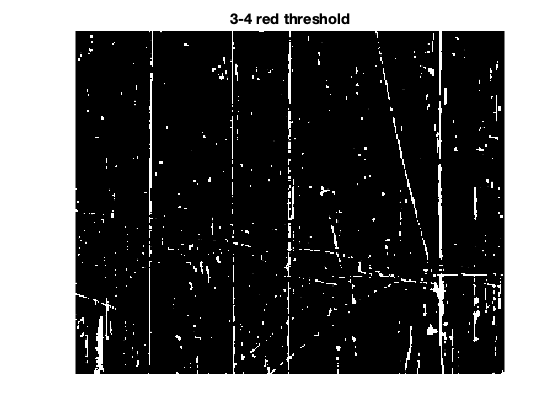

In [13]:
I_test = I_3_r-I_4_r;
threshold = 40;
I_test(I_test>threshold) = 255;
I_test(I_test<threshold) = 0;
figure()
imshow(I_test)
title('3-4 red threshold')


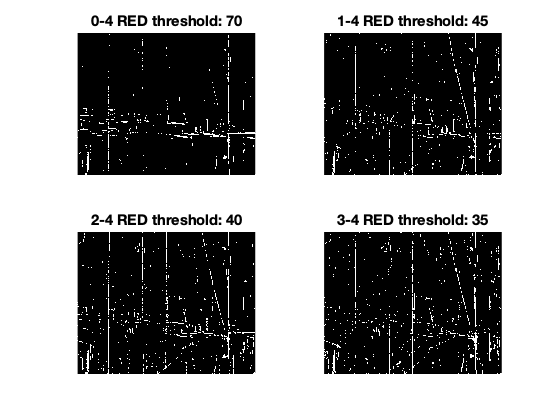

In [14]:
threshold_04 = 70;
threshold_14 = 45;
threshold_24 = 40;
threshold_34 = 35;

I_04 = I_0_r-I_4_r;
I_14 = I_1_r-I_4_r;
I_24 = I_2_r-I_4_r;
I_34 = I_3_r-I_4_r;

I_04(I_04>threshold_04) = 255;
I_04(I_04<=threshold_04) = 0;

I_14(I_14>threshold_14) = 255;
I_14(I_14<=threshold_14) = 0;

I_24(I_24>threshold_24) = 255;
I_24(I_24<=threshold_24) = 0;

I_34(I_34>threshold_34) = 255;
I_34(I_34<=threshold_34) = 0;

figure(18);
subplot(2,2,1);  imshow(I_04);
title(['0-4 RED threshold: ' num2str(threshold_04)]);

subplot(2,2,2); imshow(I_14);
title(['1-4 RED threshold: ' num2str(threshold_14)]);

subplot(2,2,3); imshow(I_24);
title(['2-4 RED threshold: ' num2str(threshold_24)]);


subplot(2,2,4); imshow(I_34);
title(['3-4 RED threshold: ' num2str(threshold_34)])


**Observation:**
- the background takes over at t=0 $\rightarrow$ check the movement correction for this
- there is some noise that looks like ~salt and pepper $\rightarrow$ try to remove using median filter

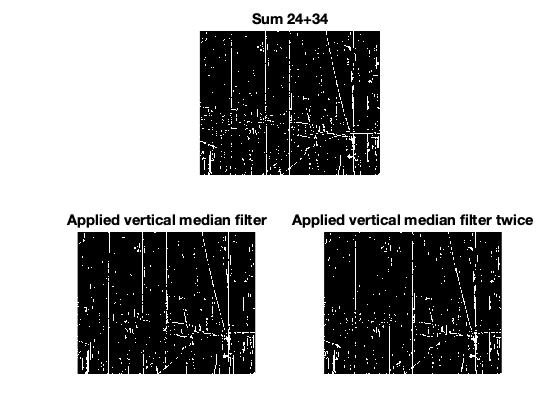

In [15]:
I_sum = I_24+I_34;
I_med = vertical_median(I_sum,3);
I_med_2 = vertical_median(I_med,3);

figure(19)
subplot(2,2,[1,2]); imshow(I_sum);
title('Sum 24+34');

subplot(2,2,3); imshow(I_med);
title('Applied vertical median filter')
subplot(2,2,4); imshow(I_med_2);
title('Applied vertical median filter twice')

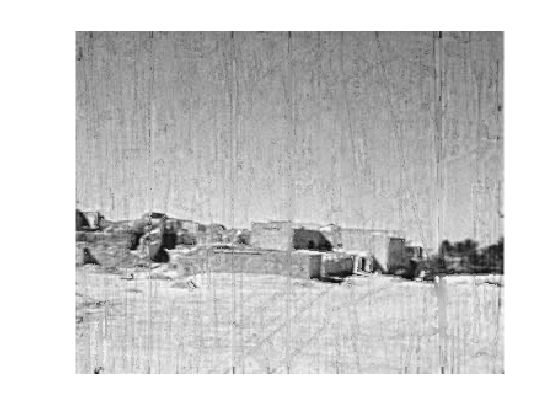

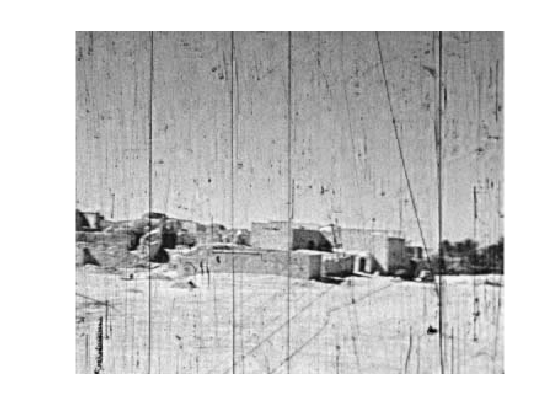

In [16]:
I_s = smooth(I_4_r, I_sum);
figure()
imshow(I_s)

figure()
imshow(I_4_r)

# Smoothing each red image

## t = 0

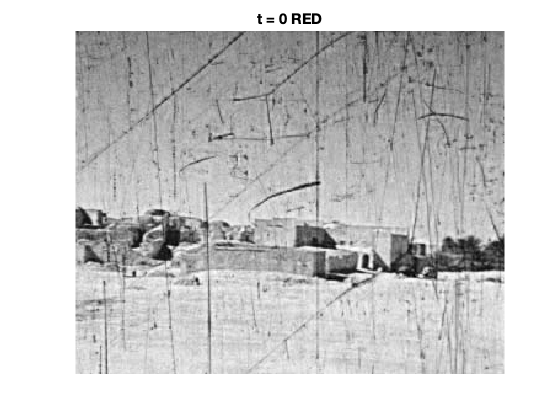

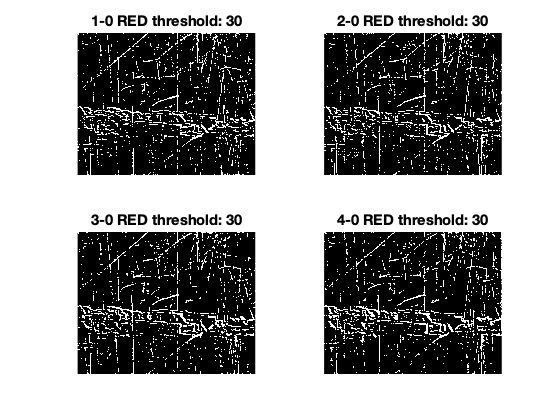

In [17]:
threshold_10 = 30;
threshold_20 = 30;
threshold_30 = 30;
threshold_40 = 30;

I_10 = I_1_r-I_0_r;
I_20 = I_2_r-I_0_r;
I_30 = I_3_r-I_0_r;
I_40 = I_4_r-I_0_r;

I_10(I_10>threshold_10) = 255;
I_10(I_10<=threshold_10) = 0;

I_20(I_20>threshold_20) = 255;
I_20(I_20<=threshold_20) = 0;

I_30(I_30>threshold_30) = 255;
I_30(I_30<=threshold_30) = 0;

I_40(I_40>threshold_40) = 255;
I_40(I_40<=threshold_40) = 0;

figure(); imshow(I_0_r); title('t = 0 RED')

figure();
subplot(2,2,1);  imshow(I_10);
title(['1-0 RED threshold: ' num2str(threshold_10)]);

subplot(2,2,2); imshow(I_20);
title(['2-0 RED threshold: ' num2str(threshold_20)]);

subplot(2,2,3); imshow(I_30);
title(['3-0 RED threshold: ' num2str(threshold_30)]);

subplot(2,2,4); imshow(I_40);
title(['4-0 RED threshold: ' num2str(threshold_40)])

**Observation:** the background is still here! Need to check the movement correction!

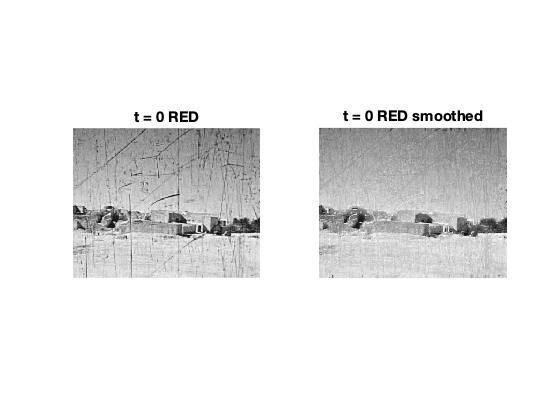

In [18]:
I_sum_0 = 0.25*I_10+0.25*I_20+0.25*I_30+0.25*I_40;

figure(); subplot(1,2,1);
imshow(I_0_r);
title('t = 0 RED');

subplot(1,2,2);
imshow(smooth(I_0_r, I_sum_0));
title('t = 0 RED smoothed');

## t = 1

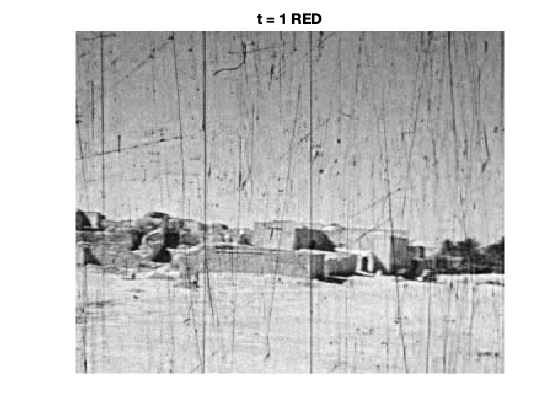

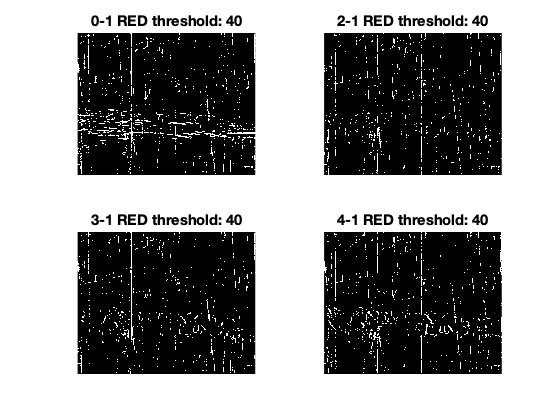

In [19]:
threshold_01 = 40;
threshold_21 = 40;
threshold_31 = 40;
threshold_41 = 40;

I_01 = I_0_r-I_1_r;
I_21 = I_2_r-I_1_r;
I_31 = I_3_r-I_1_r;
I_41 = I_4_r-I_1_r;

I_01(I_01>threshold_01) = 255;
I_01(I_01<=threshold_01) = 0;

I_21(I_21>threshold_21) = 255;
I_21(I_21<=threshold_21) = 0;

I_31(I_31>threshold_31) = 255;
I_31(I_31<=threshold_31) = 0;

I_41(I_41>threshold_41) = 255;
I_41(I_41<=threshold_41) = 0;

figure(); imshow(I_1_r); title('t = 1 RED')

figure();
subplot(2,2,1);  imshow(I_01);
title(['0-1 RED threshold: ' num2str(threshold_01)]);

subplot(2,2,2); imshow(I_21);
title(['2-1 RED threshold: ' num2str(threshold_21)]);

subplot(2,2,3); imshow(I_31);
title(['3-1 RED threshold: ' num2str(threshold_31)]);

subplot(2,2,4); imshow(I_41);
title(['4-1 RED threshold: ' num2str(threshold_41)])

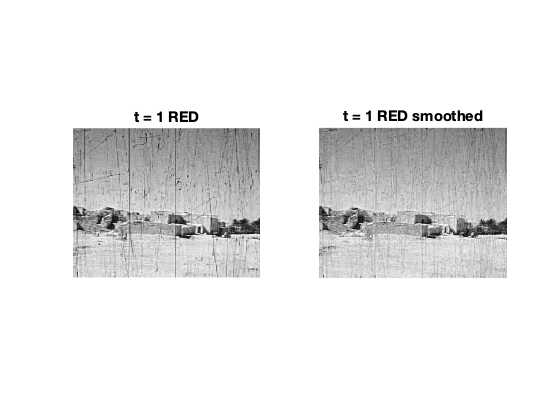

In [20]:
I_sum_1 = 0.33*I_21+0.3*I_31+0.3*I_41;

figure(); subplot(1,2,1);
imshow(I_1_r);
title('t = 1 RED');

subplot(1,2,2);
imshow(smooth(I_1_r, I_sum_1));
title('t = 1 RED smoothed');

## t = 2

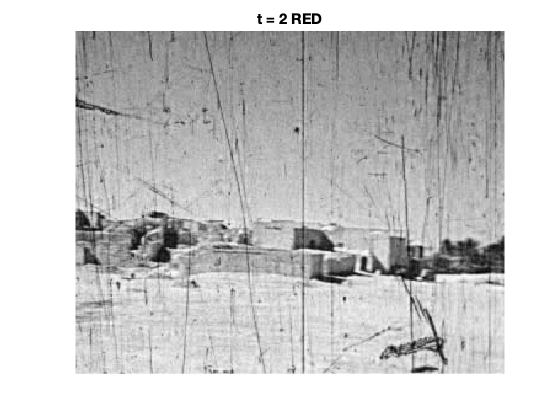

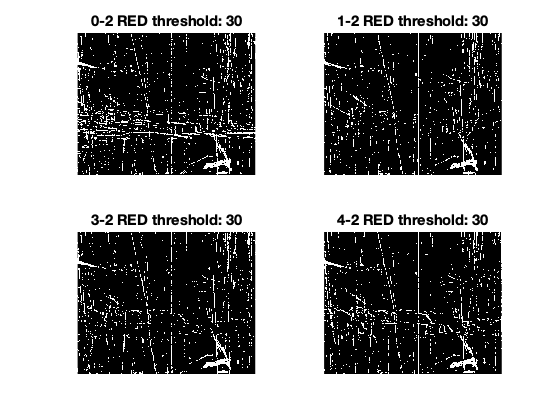

In [21]:
threshold_02 = 30;
threshold_12 = 30;
threshold_32 = 30;
threshold_42 = 30;

I_02 = I_0_r-I_2_r;
I_12 = I_1_r-I_2_r;
I_32 = I_3_r-I_2_r;
I_42 = I_4_r-I_2_r;

I_02(I_02>threshold_02) = 255;
I_02(I_02<=threshold_02) = 0;

I_12(I_12>threshold_12) = 255;
I_12(I_12<=threshold_12) = 0;

I_32(I_32>threshold_32) = 255;
I_32(I_32<=threshold_32) = 0;

I_42(I_42>threshold_42) = 255;
I_42(I_42<=threshold_42) = 0;

figure(); imshow(I_2_r); title('t = 2 RED')

figure();
subplot(2,2,1);  imshow(I_02);
title(['0-2 RED threshold: ' num2str(threshold_02)]);

subplot(2,2,2); imshow(I_12);
title(['1-2 RED threshold: ' num2str(threshold_12)]);

subplot(2,2,3); imshow(I_32);
title(['3-2 RED threshold: ' num2str(threshold_32)]);

subplot(2,2,4); imshow(I_42);
title(['4-2 RED threshold: ' num2str(threshold_42)])

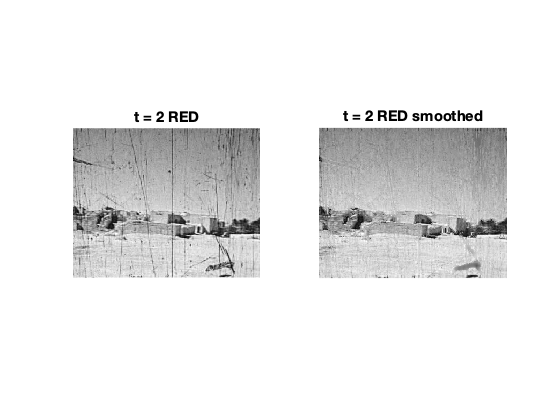

In [22]:
I_sum_2 = 0.33*I_12+0.3*I_32+0.3*I_42;

figure(); subplot(1,2,1);
imshow(I_2_r);
title('t = 2 RED');

subplot(1,2,2);
imshow(smooth(I_2_r, I_sum_2));
title('t = 2 RED smoothed');

## t = 3

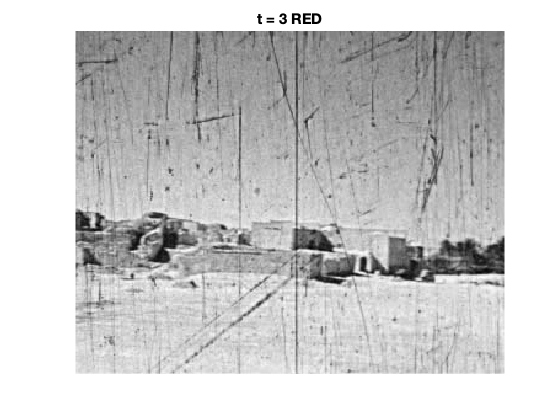

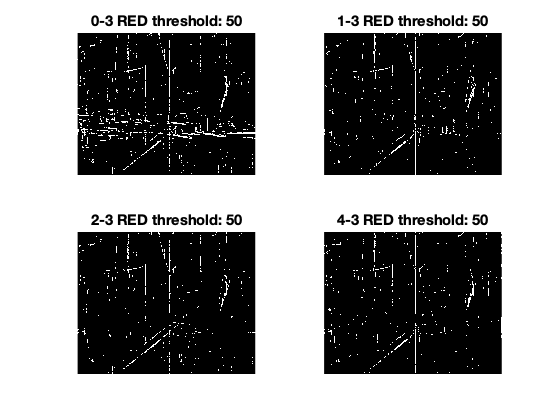

In [23]:
threshold_03 = 50;
threshold_13 = 50;
threshold_23 = 50;
threshold_43 = 50;

I_03 = I_0_r-I_3_r;
I_13 = I_1_r-I_3_r;
I_23 = I_2_r-I_3_r;
I_43 = I_4_r-I_3_r;

I_03(I_03>threshold_03) = 255;
I_03(I_03<=threshold_03) = 0;

I_13(I_13>threshold_13) = 255;
I_13(I_13<=threshold_13) = 0;

I_23(I_23>threshold_23) = 255;
I_23(I_23<=threshold_23) = 0;

I_43(I_43>threshold_43) = 255;
I_43(I_43<=threshold_43) = 0;

figure(); imshow(I_3_r);
title('t = 3 RED')

figure();
subplot(2,2,1);  imshow(I_03);
title(['0-3 RED threshold: ' num2str(threshold_03)]);

subplot(2,2,2); imshow(I_13);
title(['1-3 RED threshold: ' num2str(threshold_13)]);

subplot(2,2,3); imshow(I_23);
title(['2-3 RED threshold: ' num2str(threshold_23)]);


subplot(2,2,4); imshow(I_43);
title(['4-3 RED threshold: ' num2str(threshold_43)])


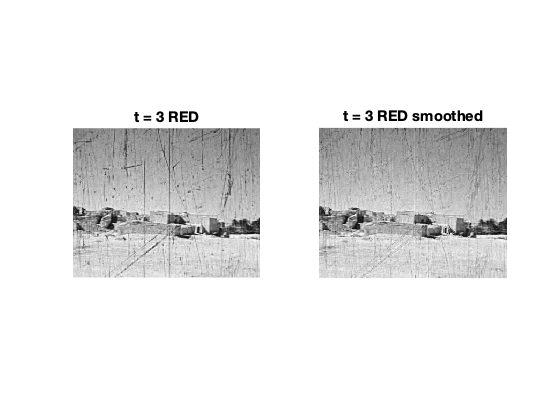

In [24]:
I_sum_3 = 0.33*I_13+0.3*I_23+0.3*I_43;

figure(); subplot(1,2,1);
imshow(I_3_r);
title('t = 3 RED');

subplot(1,2,2);
imshow(smooth(I_3_r, I_sum_3));
title('t = 3 RED smoothed');

## t = 4

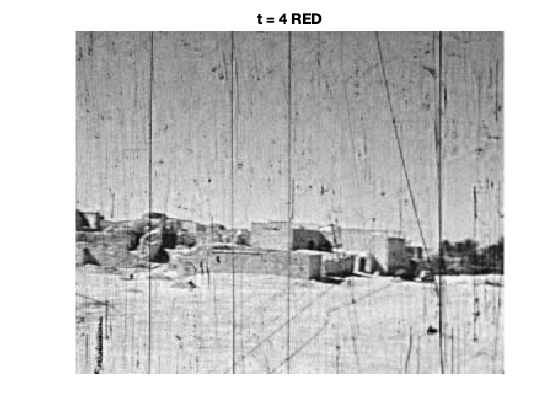

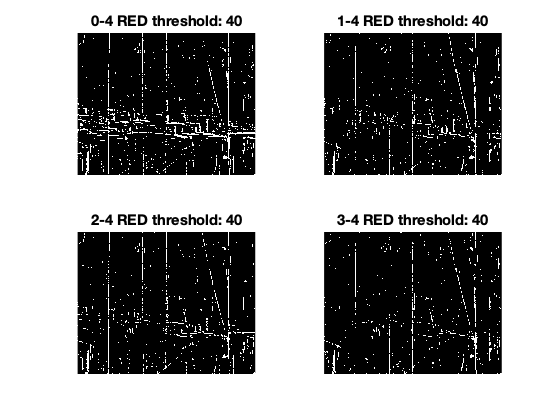

In [25]:
threshold_04 = 40;
threshold_14 = 40;
threshold_24 = 40;
threshold_34 = 40;

I_04 = I_0_r-I_4_r;
I_14 = I_1_r-I_4_r;
I_24 = I_2_r-I_4_r;
I_34 = I_3_r-I_4_r;

I_04(I_04>threshold_04) = 255;
I_04(I_04<=threshold_04) = 0;

I_14(I_14>threshold_14) = 255;
I_14(I_14<=threshold_14) = 0;

I_24(I_24>threshold_24) = 255;
I_24(I_24<=threshold_24) = 0;

I_34(I_34>threshold_34) = 255;
I_34(I_34<=threshold_34) = 0;

figure(); imshow(I_4_r);
title('t = 4 RED')

figure();
subplot(2,2,1);  imshow(I_04);
title(['0-4 RED threshold: ' num2str(threshold_04)]);

subplot(2,2,2); imshow(I_14);
title(['1-4 RED threshold: ' num2str(threshold_14)]);

subplot(2,2,3); imshow(I_24);
title(['2-4 RED threshold: ' num2str(threshold_24)]);


subplot(2,2,4); imshow(I_34);
title(['3-4 RED threshold: ' num2str(threshold_34)])


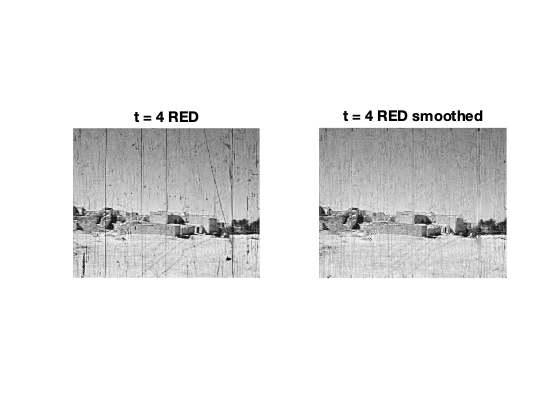

In [26]:
I_sum_4 = 0.33*I_14+0.3*I_24+0.3*I_34;


figure(); subplot(1,2,1);
imshow(I_4_r);
title('t = 4 RED');

subplot(1,2,2);
imshow(smooth(I_4_r, I_sum_4));
title('t = 4 RED smoothed');



#  Every layer sep and together

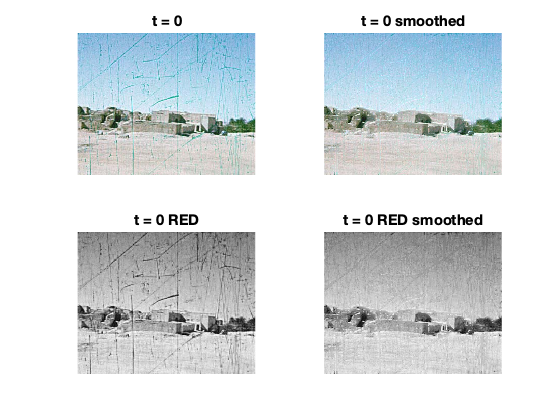

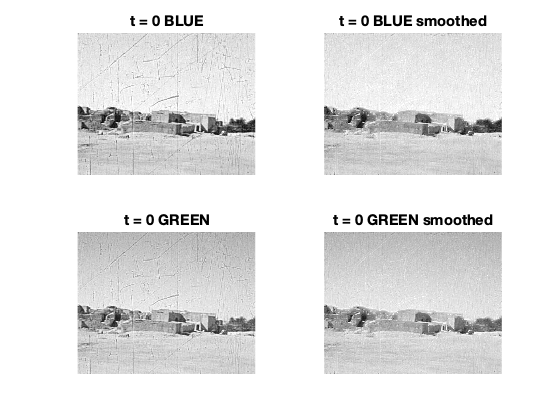

In [27]:
figure();

subplot(2,2,1);
imshow(I_0);
title('t = 0');

subplot(2,2,2);
I_0_3d = I_0;
I_0_3d(:,:,1) = smooth(I_0_r, I_sum_0);
I_0_3d(:,:,2) = smooth(I_0_g, I_sum_0);
I_0_3d(:,:,3) = smooth(I_0_b, I_sum_0);
imshow(I_0_3d);
title('t = 0 smoothed');


subplot(2,2,3);
imshow(I_0_r);
title('t = 0 RED');

subplot(2,2,4);
imshow(smooth(I_0_r, I_sum_0));
title('t = 0 RED smoothed');


figure(); subplot(2,2,1);
imshow(I_0_b);
title('t = 0 BLUE');

subplot(2,2,2);
imshow(smooth(I_0_b, I_sum_0));
title('t = 0 BLUE smoothed');

subplot(2,2,3);
imshow(I_0_g);
title('t = 0 GREEN');

subplot(2,2,4);
imshow(smooth(I_0_g, I_sum_0));
title('t = 0 GREEN smoothed');

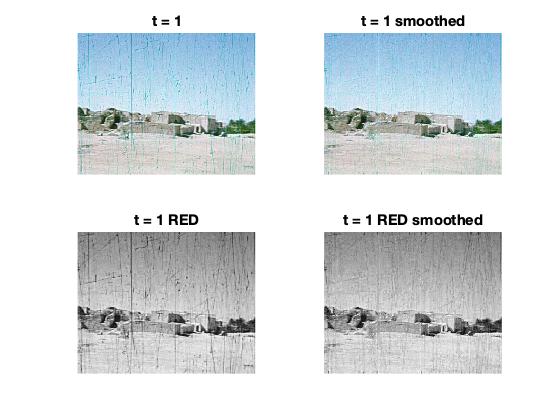

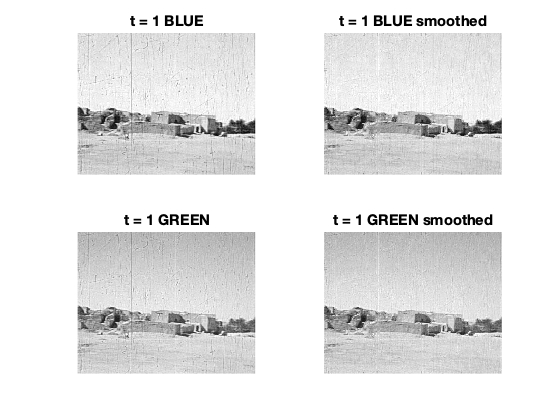

In [28]:
figure();

subplot(2,2,1);
imshow(I_1);
title('t = 1');

subplot(2,2,2);
I_1_3d = I_1;
I_1_3d(:,:,1) = smooth(I_1_r, I_sum_1);
I_1_3d(:,:,2) = smooth(I_1_g, I_sum_1);
I_1_3d(:,:,3) = smooth(I_1_b, I_sum_1);
imshow(I_1_3d);
title('t = 1 smoothed');


subplot(2,2,3);
imshow(I_1_r);
title('t = 1 RED');

subplot(2,2,4);
imshow(smooth(I_1_r, I_sum_1));
title('t = 1 RED smoothed');


figure(); subplot(2,2,1);
imshow(I_1_b);
title('t = 1 BLUE');

subplot(2,2,2);
imshow(smooth(I_1_b, I_sum_1));
title('t = 1 BLUE smoothed');

subplot(2,2,3);
imshow(I_1_g);
title('t = 1 GREEN');

subplot(2,2,4);
imshow(smooth(I_1_g, I_sum_1));
title('t = 1 GREEN smoothed');

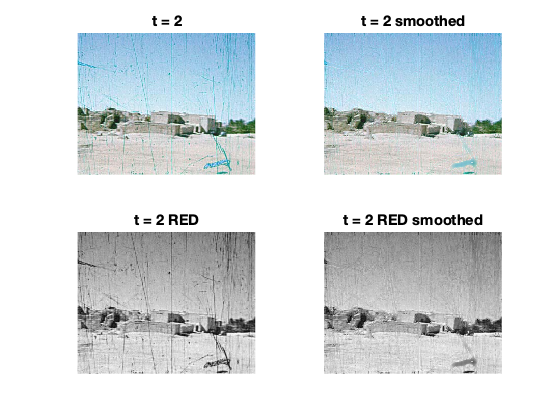

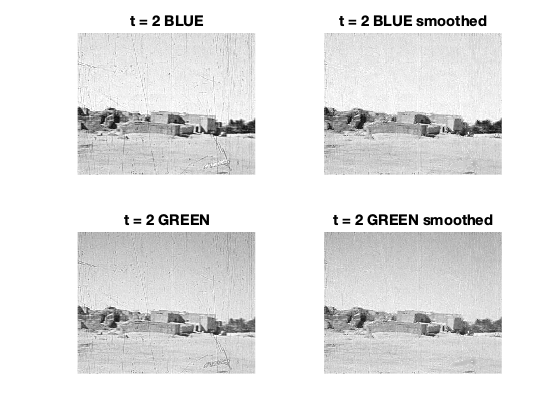

In [29]:
figure();

subplot(2,2,1);
imshow(I_2);
title('t = 2');

subplot(2,2,2);
I_2_3d = I_2;
I_2_3d(:,:,1) = smooth(I_2_r, I_sum_2);
I_2_3d(:,:,2) = smooth(I_2_g, I_sum_2);
I_2_3d(:,:,3) = smooth(I_2_b, I_sum_2);
imshow(I_2_3d);
title('t = 2 smoothed');


subplot(2,2,3);
imshow(I_2_r);
title('t = 2 RED');

subplot(2,2,4);
imshow(smooth(I_2_r, I_sum_2));
title('t = 2 RED smoothed');


figure(); subplot(2,2,1);
imshow(I_2_b);
title('t = 2 BLUE');

subplot(2,2,2);
imshow(smooth(I_2_b, I_sum_2));
title('t = 2 BLUE smoothed');

subplot(2,2,3);
imshow(I_2_g);
title('t = 2 GREEN');

subplot(2,2,4);
imshow(smooth(I_2_g, I_sum_2));
title('t = 2 GREEN smoothed');

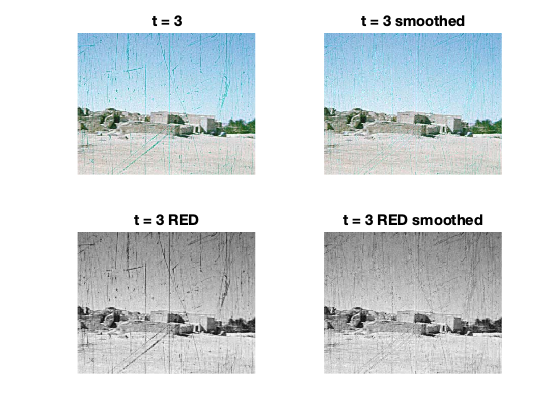

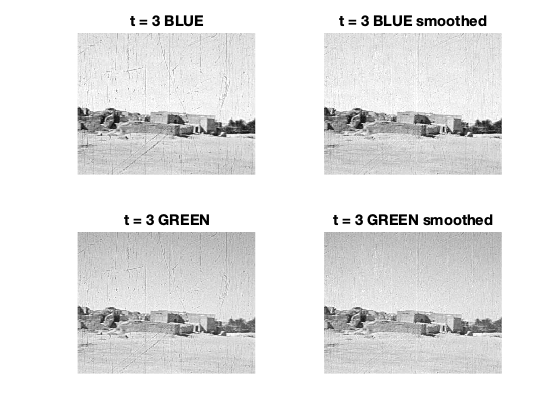

In [30]:
figure();

subplot(2,2,1);
imshow(I_3);
title('t = 3');

subplot(2,2,2);
I_3_3d = I_3;
I_3_3d(:,:,1) = smooth(I_3_r, I_sum_3);
I_3_3d(:,:,2) = smooth(I_3_g, I_sum_3);
I_3_3d(:,:,3) = smooth(I_3_b, I_sum_3);
imshow(I_3_3d);
title('t = 3 smoothed');


subplot(2,2,3);
imshow(I_3_r);
title('t = 3 RED');

subplot(2,2,4);
imshow(smooth(I_3_r, I_sum_3));
title('t = 3 RED smoothed');


figure(); subplot(2,2,1);
imshow(I_3_b);
title('t = 3 BLUE');

subplot(2,2,2);
imshow(smooth(I_3_b, I_sum_3));
title('t = 3 BLUE smoothed');

subplot(2,2,3);
imshow(I_3_g);
title('t = 3 GREEN');

subplot(2,2,4);
imshow(smooth(I_3_g, I_sum_3));
title('t = 3 GREEN smoothed');

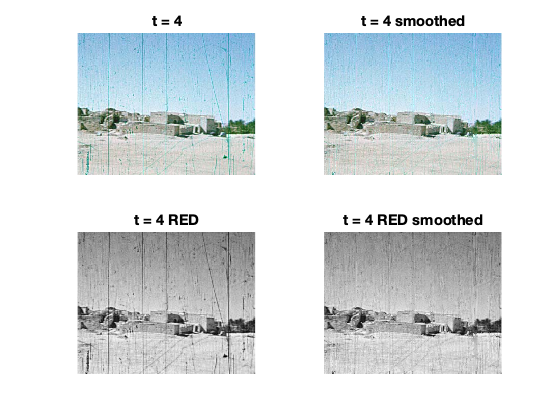

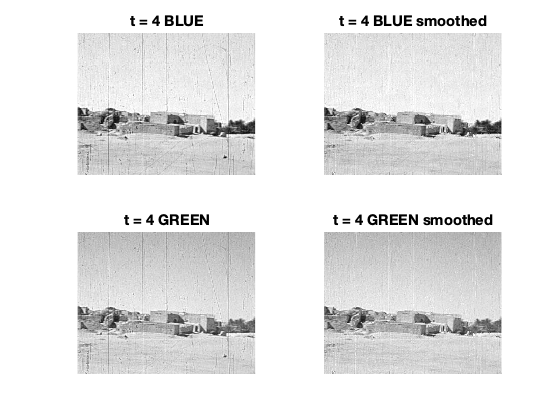

In [31]:
figure();

subplot(2,2,1);
imshow(I_4);
title('t = 4');

subplot(2,2,2);
I_4_3d = I_4;
I_4_3d(:,:,1) = smooth(I_4_r, I_sum_4);
I_4_3d(:,:,2) = smooth(I_4_g, I_sum_4);
I_4_3d(:,:,3) = smooth(I_4_b, I_sum_4);
imshow(I_4_3d);
title('t = 4 smoothed');


subplot(2,2,3);
imshow(I_4_r);
title('t = 4 RED');

subplot(2,2,4);
imshow(smooth(I_4_r, I_sum_4));
title('t = 4 RED smoothed');


figure(); subplot(2,2,1);
imshow(I_4_b);
title('t = 4 BLUE');

subplot(2,2,2);
imshow(smooth(I_4_b, I_sum_4));
title('t = 4 BLUE smoothed');

subplot(2,2,3);
imshow(I_4_g);
title('t = 4 GREEN');

subplot(2,2,4);
imshow(smooth(I_4_g, I_sum_4));
title('t = 4 GREEN smoothed');

**Observation:** the scratch removal works very good for the green and blue layers but worse for the red layer. This implies that the detection of the scratches works fine but not the restoration! Should probably use something else than just regular median filtering...

# Summary

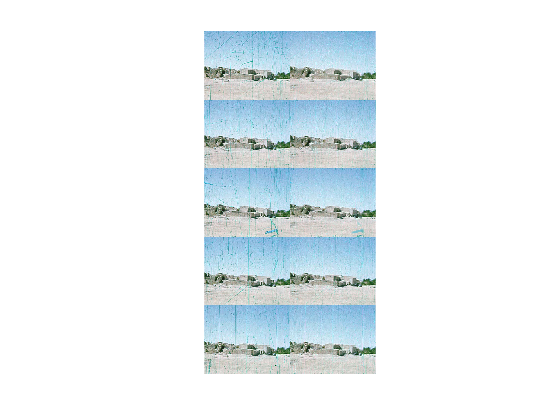

In [32]:
figure();
imshow([I_0, I_0_3d;
        I_1,I_1_3d;
        I_2,I_2_3d;
        I_3,I_3_3d;
        I_4,I_4_3d]);

**Observation:** some dark details disappear when smoothing. This is probably because the design of the smooth.m function. *Maybe change the if-condition?*